# **Apriori and Eclat**

0. Install Apyori in order to work with Apriori and Eclat in Python

In [27]:
#!pip install apyori

# 1. Import the libraries

In [28]:
import pandas as pd
import numpy as np

# 2. Import the dataset

In [29]:
_dataset = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
print(_dataset.shape[0], _dataset.shape[1])

7501 20


# 3. Preprocess the data

In [30]:
_transactions = []
for i in range(_dataset.shape[0]):
  _transactions.append([str(_dataset.values[i,j]) for j in range(_dataset.shape[1])])

# 4. Train the Apriori model

The parameters of the Apropri model 

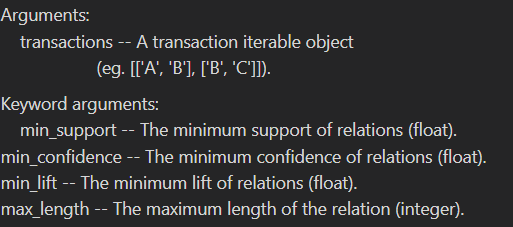

*Support* = $P(A \cap B) = \frac{\text{number of transactions containing A and B}}{\text{total number of transactions}}$ 

*Confidence* = $P(A | B) = \frac{\text{number of transactions containing A and B}}{\text{total number of transactions containing A}}$

*Lift* = $\frac{\text{Confidence}}{\text{Support}}$

In [31]:
from apyori import apriori
_rules_apriori = apriori(transactions = _transactions, min_support = 0.003, min_confidende = 0.2, min_lift = 3, max_length = 2, min_length = 2)

In [32]:
_rules_apriori = list(_rules_apriori)
_rules_apriori

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

# 5. Visualization of results for the Apriori model

In [49]:
def _createDfApriori(rules):
  _LHS = [tuple(rule[2][0][0])[0] for rule in rules]
  _RHS = [tuple(rule[2][0][1])[0] for rule in rules]
  _supports = [rule[1] for rule in rules]
  _confidences = [rule[2][0][2] for rule in rules]
  _lifts = [rule[2][0][3] for rule in rules]
  return list(zip(_LHS, _RHS, _supports, _confidences, _lifts))


_columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift']
_resultsDfApriori = pd.DataFrame(_createDfApriori(_rules_apriori), columns = _columns)

In [50]:
_resultsDfApriori.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
6,fromage blanc,honey,0.003333,0.245098,5.164271
1,chicken,light cream,0.004533,0.075556,4.843951
3,escalope,pasta,0.005866,0.073950,4.700812
11,pasta,shrimp,0.005066,0.322034,4.506672
10,olive oil,whole wheat pasta,0.007999,0.121457,4.122410
8,ground beef,tomato sauce,0.005333,0.054274,3.840659
2,escalope,mushroom cream sauce,0.005733,0.072269,3.790833
5,fresh tuna,honey,0.003999,0.179641,3.785070
7,ground beef,herb & pepper,0.015998,0.162822,3.291994
4,fresh bread,tomato juice,0.004266,0.099071,3.259356


6. Train the Eclat model

In [52]:
_rules_eclat = apriori(transactions = _transactions, min_support = 0.003,min_lift = 2,max_length = 2, min_length = 2)

In [53]:
_rules_eclat = list(_rules_eclat)
_rules_eclat

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146), OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'almonds'}), confidence=0.05963302752293578, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'avocado', 'frozen smoothie'}), support=0.005065991201173177, ordered_statistics=[OrderedStatistic(items_base=frozenset({'avocado'}), items_add=frozenset({'frozen smoothie'}), confidence=0.152, lift=2.4003200000000002), OrderedStatistic(items_base=frozenset({'frozen smoothie'}), items_add=frozenset({'avocado'}), confidence=0.08, lift=2.40032)]),
 RelationRecord(items=frozenset({'honey', 'avocado'}), support=0.003199573390214638, ordered_statistics=[OrderedStatistic(items_base=frozenset({'avocado'}), items_add=frozenset({'honey'}), confidence=0.096, lift=2.0227415730

7. Visualize the results of Eclat

In [54]:
def _createDfEclat(rules):
  _LHS = [tuple(rule[2][0][0])[0] for rule in rules]
  _RHS = [tuple(rule[2][0][1])[0] for rule in rules]
  _supports = [rule[1] for rule in rules]
  return list(zip(_LHS, _RHS, _supports))

_resultsDfEclat = pd.DataFrame(_createDfEclat(_rules_eclat), columns=['LHS', 'RHS', 'Support'])

In [55]:
_resultsDfEclat.nlargest(n=10,columns = 'Support')

,LHS,RHS,Support
51,ground beef,spaghetti,0.039195
39,frozen vegetables,shrimp,0.016664
40,frozen vegetables,tomatoes,0.016131
45,ground beef,herb & pepper,0.015998
61,milk,soup,0.015198
47,ground beef,olive oil,0.014131
41,grated cheese,ground beef,0.011332
74,shrimp,tomatoes,0.011199
73,red wine,spaghetti,0.010265
62,milk,whole wheat pasta,0.009865
